# Computational Physics - Final Exam

Date: 30-06-2020

**Name:**  

**ID:**

**Class:**

## Instructions

1. Time schedule    
    9:30-10:00: preparation    
    10:00-12:00: exam    
    12:00-12:10: submission & uploading    
    
2. There are two parts of the exam    
    - Part I: single-choice problems   
    - Part II: questions and coding problems   
    
3. You are required to submit your answers to Part I direcly via *Canvas* platform. Beaware: You have only **ONE** trial! 

4. You are required to download the file `CP_final_yourname_ID.ipynb` of Part II. **Please modify the file name to include your name!**. **Please write your name and ID in the file.**

5. You are required to write your answers (including the brief descriptions, the codes, the results and the plots) to Part II in the file during the exam session, and upload your file via *Canvas* platform after the exam session. Beaware: You have only **ONE** trial! 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import integrate
from scipy import fftpack
%matplotlib inline

## Part I

1. (4 points) The finite difference formula to approximate the first-order derivative of $f(x)$ is given as
$$
f'(x)=\frac{-3f(x)+4f(x+h)-f(x+2h)}{2h}
$$
Which of the following statements is True? 

2. (4 points) Imagine a different universe in which Newton's second law has the form, $F(x,t)=m\cfrac{d^3x}{dt^3}$. If the force is given as $F(x)=kx^3$. Express this equation in the dynamical form appropriate for a Runge-Kutta algorithm:     

3. (5 points) You are given the following data:
```
x = np.linspace(0,5.5,12)
y = np.array([9.882e-01, -7.000e-03, -3.852e-01, -1.018, -6.358e-02,  \
              1.633,  3.513,  6.121, 9.525,  1.407e+01,  1.805e+01, 2.387e+01])
```
Using the central difference formulas, the approximate values of the first-order and the second-order derivative of $y$ with respective to $x$ at $x=3.5$ would be

4. (4 points) The most effecive method to calculate the integrals is 
$$
I = \int_{-1}^1\frac{f(x)}{\sqrt{1-x^2}}dx
$$

5. (4 points) What of the following statements is True?    

6. (5 points) The following table shows the data of Romberg integration.
$$
\begin{aligned}
O(h^2) & \quad O(h^4) & O(h^6) \\
0.69393872 & & ? \\
0.71337009 & & \\
0.72928425 & &  
\end{aligned}
$$
The final result of sixth-order accuracy would be： 

7. (5 points) The following code aims to generate a series of random numbers. The probability density function $p(x)$ should be
```
N = 10000
u = np.random.rand(N)
x = np.cbrt(8*u)
```

8. (5 points) How many errors can you find in the following code?
```
% Determine the period of an anharmonic oscillator   

from scipy_integrate import solve_ivp   

def anharmonic_oscillator(t,y)      
    return [y[1], -np.sin(y[0])]      

tspan = np.linespace(0,30,1000)     
yinit = [np.pi/6; 0]      
sol = solve_ivp(anharmonic_oscillator, [tspan[0],tspan[end]], yinit,t_eval=tspan)    t = sol.t    
y = sol.y(0,:)    

tmax = np.zeros()    
for n in np.arange(1,len(t)):    
    if y[n] > y[n-1] AND y[n] > y[n+1]   
        tmax = np.append(tmax,t[n])   
        
period = np.mean(np.dif(tmax))     
print('period = {:d}'.format(period)   
```

9. (4 points) Which of the following methods can NOT be used to solve the energy eigenvalues of hydrogen atom?

## Part II

1. (25 points) A  single particle is in the state of 
$$
\psi(x) = \begin{cases}
Ae^{\cos(x)},\quad &0 ≤ x ≤ 4π \\
0, &\text{otherwise}
\end{cases}
$$
where $\psi(x)$ is the wave function. 

(1) (5 points) Write the **vectorized** code to implement the trapezoid's rule to determine the normalization factor $A$. The total number $N$ of $x$ nodes is set as $N=10$. How much is the step size $\Delta x$?     

(2) (2 points) Define the wave function using `lamda`. 

(3) (3 points) Compare your result of (1) with the result from the built-in function of `scipy.integrate` package. Calculate the relative error (You can take the average value of both results as the exact value).  

(4) (4 points) Plot the normalized wave function. The figure size is set to be (10,7). The fontsize of title to be 16, the fontsize of axis labels to be 12. Set the range of $x$-axis to be $[0,4\pi]$. Turn on the grid.      

(5) (4 points) Write the code to approximate Fourier transform, the variable is called `phi`. The total number $N$ of $x$ nodes is set as $N=101$. How much is the step size $\Delta k$ in the $k-$space?     

(6) (4 points) The code below employs `scipy.fftpack` package to calculate FFT of the wavefunction, the variable is called `G`. Please write the comments to each line.    

(7) (3 points) If you compare the results from (5) and (6), you will see big differences between the two. Can you modify the code of (6) so that the power spectrum of `phi` and `G` agrees with each other? 

In [3]:
# Problem (1-1) (5 points)  
# Write the **vectorized** code to implement the trapezoid's rule to determine the normalization factor A. 
# The total number N of x nodes is set as N=10. How much is the step size dx?

N = 10

def trapezoid(f,a,b,N = 10):
    
    x = np.linspace(a,b,N) 
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N # the step
    T = (dx/2) * np.sum(y_right + y_left)
    return T


In [4]:
# Problem (1-2) (2 points) 
# Define the wave function using `lamda`.
# psi_func = lambda x: xxx
psi_func  = lambda x: np.exp(np.cos(x))

In [5]:
# Problem (1-3) (3 points)
# Compare your result of (1) with the result from the built-in function of `scipy.integrate` package. 
# Calculate the relative error (You can take the average value of both results as the exact value).  

#trapezoid method
T_t = trapezoid(psi_func,0,4 * np.pi)
print(f'Trapezoid method value is {T_t}')

x = np.linspace(0,4*np.pi,N)
y = psi_func(x)
T_s = integrate.trapz(x,y)
print(f'Scipy method value is {T_s}')

#exact value 
T_e = (T_s + T_t)/2

#relative error 
r_e_t = abs(T_e - T_t) / T_e * 100
r_e_s = abs(T_e - T_s) / T_e * 100

print(f'relative error for trapezoid method is {r_e_t}%')
print(f'relative error for scipy method is {r_e_s}%')

Trapezoid method value is 14.318867862646066
Scipy method value is 18.24908370997641
relative error for trapezoid method is 12.067740393701007%
relative error for scipy method is 12.067740393701007%


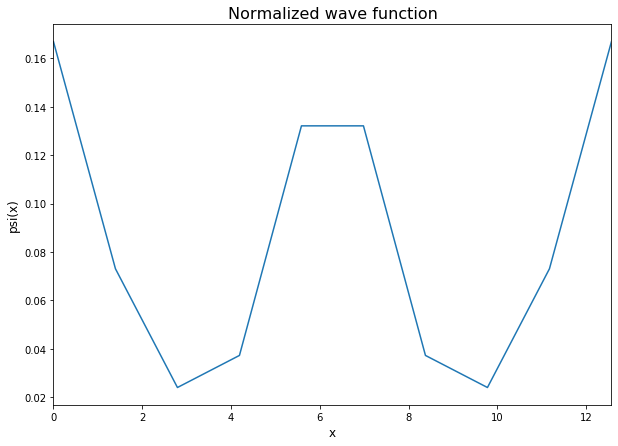

In [6]:
# Problem (1-4) (4 points) 
# Plot the normalized wave function. The figure size to be (10,7). 
# The fontsize of title to be 16, the fontsize of axis labels to be 12.  
# Set the range of x-axis to be [0,4pi]. 
# Turn on the grid. 
N = 10
x = np.linspace(0,4*np.pi,N)
psi = psi_func(x) / T_e
fig,ax = fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('Normalized wave function',fontsize = 16)
ax.plot(x,psi)
ax.set_xlim(0,4*np.pi)
ax.set_xlabel('x',fontsize = 12)
ax.set_ylabel('psi(x)',fontsize = 12)
plt.show()

In [7]:
# Problem (1-5) (4 points)
# Write the code to approximate Fourier transform, the variable is called `phi`. 
# The total number N of x nodes is set as N=101. 
# How much is the step size dk in the k-space? 

N = 101 # number of samples
psi_f = lambda x: np.exp(np.cos(x)) / T_e
def fourier(psi,a,b,N = 101):
    x = np.linspace(a, b, N)
    dx = (b-a)/ N
    psi = psi(x)
    kmax = np.pi / dx
    k = np.linspace(-kmax, kmax, N)
    dk = 2*kmax /N # step of k
    phi = np.zeros(N, dtype=np.complex)
    for i in range(N):
        phi[i] =  (dx / np.sqrt(2*np.pi)) * sum(psi*np.exp(-1j*k[i]*x)) 
    phi = np.abs(phi)
    return phi
phi = fourier(psi_f ,0,4*np.pi)

In [8]:
# Problem (1-6) (4 points) 
# The code below employs `scipy.fftpack` package to calculate DFT of the wavefunction, the variable is called `G`. 
# Please write the comments to each line.
x = x = np.linspace(0, 4*np.pi, N)
psi = psi_f(x)
dx = 4 * np.pi /N
g = psi.flatten() # make a 1-d array
G = fftpack.fft(g)#FFT of g
f = fftpack.fftfreq(g.size, d=dx) #FFT frequenies
f = fftpack.fftshift(f) #shift freqs from min to max
G = fftpack.fftshift(G) #shift G order to match f

In [9]:
# Problem (1-7) (3 points) 
# If you compare the results from (5) and (6), you will see big differences between the two. 
# Can you modify the code of (6) so that the power spectrum of `phi` and `G` agrees with each other?

max_dif_before = max(abs(np.abs(G) - np.abs(phi)))
print('The max difference before the modification: {:}.'.format(max_dif_before))

# To modify where it's necessary
G1 = fftpack.fft(g) 
f1 = fftpack.fftfreq(g.size, d=dx) 
f1 = fftpack.fftshift(f1)*2*np.pi 
G1 = fftpack.fftshift(G1)*dx/np.sqrt(2*np.pi) 

max_dif_after = max(abs(np.abs(G1) - np.abs(phi)))
print('The max difference after the modification: {:}.'.format(max_dif_after))

The max difference before the modification: 7.547645346362286.
The max difference after the modification: 0.018076652994083037.


2. (25 points) The conservation of heat can be used to develop a heat balance for a long, thin rod. If the rod is not insulated along its length and the system is at a steady state, the equation that results is 
$$
\frac{d^2T}{dx^2}+ \kappa (T_a - T ) = 0
$$
The total length of the rod $L=10$ m. $\kappa = 0.01$ m$^2$. $T_a = 20$. The boundary conditions are given as $T(0)=40$, $T(10)=200$.     

(1) (3 points) Apply the shooting method in combination of RK4 to solve the BVP again. Please first define the drive function, the returning variable is of data type `list`. 

(2) (4 points) The code `rk4` for the implementation of Rk4 is provided as follows. Complete the test function `rod_rk4_app` to plot the values of $T(10)$ vs $T'(0)$. Take the step size $\Delta x = 2$.  

(3) (6 points) Following (1) and (2), define the root-finding function `rod_root`.  Use the built-in function of `scipy.optimize` package to solve the BVP. Print out the results of $T$s at $x=2,4,6,8$. 

(4) (8 points) The finite-difference approach yields the linear system of equations as $AT=b$. Take the step size $\Delta x = 2$. Calculate the coefficients and generate $A$ and $b$ via `diag`. Write the code and print out the results of $T$s at $x=2,4,6,8$.    

(5) (4 points) The exact solution is $T=73.4523e^{0.1x} - 53.4523e^{-0.1x}+20$. Comment on the comparison of your results of (3) and (4) with the exact solution. What are the maximum relative errors concerning the two methods? 

In [34]:
# Problem (2-1) (3 points)
# Apply the shooting method in combination of RK4 to solve the BVP again. 
# Please first define the drive function, the returning variable is of data type list.
L = 10 
Ta = 20
kappa = 0.001 

def rod_drive(x,T):

    return  -kappa*(Ta - T(x))

In [33]:
# Problem (2-2) (4 points)
# The code rk4 for the implementation of Rk4 is provided as follows. 
# Complete the test function rod_rk4_app to plot the values of  𝑇(10) vs 𝑇′(0). 
# Take the step size  Δ𝑥=2.

def rk4(f,x,y0):
    # f: the drive function
    # x: numpy array of x nodes
    # y0: numpy array describing the boundary conditions at x=0
    
    N = len(x)
    h = x[1] - x[0]
    y = np.zeros((N, y0.size))
    y[0] = y0
    for n in range(0, N - 1):
        k1 = np.array(f(x[n], y[n]))
        k2 = np.array(f(x[n]+h/2, y[n]+h*k1/2))
        k3 = np.array(f(x[n]+h/2, y[n]+h*k2/2))
        k4 = np.array(f(x[n+1], y[n]+h*k3))        
        y[n+1] = y[n] + h * (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

L = 10
dx = 2
xs = np.arange(0,L+dx,2) 
T0 = 40
TL = 200

def rod_rk4_app():
    T = [T0]
    T.append(2 * T[0] - 2 * 4 * T[0] * rod_drive(0  ,T))
    for i in range(1,len(xs)-1):
        T.append( 2 * T[i] - T[i-1] - 2 * dx*dx * rod_drive(i,T))
    T_1 = np.zeros_like(xs)
    y0 = np.array(T)
    rk4(rod_drive,xs,y0)
    fig,ax = fig, ax = plt.subplots(figsize=(10,7))
    ax.set_title("T(x) VS T'(x)",fontsize = 16)
    ax.plot(T,T_1)
    ax.set_xlabel('T(x)',fontsize = 12)
    ax.set_ylabel("T'(x)",fontsize = 12)
    plt.show()

rod_rk4_app()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [32]:
# Problem (2-3) (6 points) 
# Following (1) and (2), define the root-finding function rod_root. 
# Use the built-in function of scipy.optimize package to solve the BVP. 
# Print out the results of  𝑇s at 𝑥=2,4,6,8.

def rod_root(alpha):
    T[0]

from scipy.optimize import fsolve
    fsolve()

IndentationError: expected an indented block (<ipython-input-32-a2a9374b4c97>, line 9)

In [27]:
# problem 2-4 (8 points) 
# The finite-difference approach yields the linear system of equations as  𝐴𝑇=𝑏. 
# Take the step size  Δ𝑥=2. Calculate the coefficients and generate 𝐴 and 𝑏  via 
# diag. Write the code and print out the results of  𝑇s at𝑥=2,4,6,8.



In [28]:
# problem (2-5) (4 points) 
# The exact solution is  𝑇=73.4523𝑒^{0.1𝑥}−53.4523𝑒^{−0.1𝑥}+20. 
# Comment on the comparison of your results of (3) and (4) with the exact solution.
# What are the maximum relative errors concerning the two methods?

Texact = 73.4523*np.exp(0.1*xs[1:5]) - 53.4523*np.exp(-0.1*xs[1:5]) + 20


3. (10 points) Find the volume of a four-dimensional sphere of radius 2. A sphere is defined to be the set of points such that:
$$
\sum_{i=1}^D x^2_i ≤ R^2
$$
where $D$ is the dimension of the space, $R$ is the radius of the sphere, and the set $\{x_i\}^D_{i=1}$ are the coordinates (so, for example, in $D = 2$, we have $x_1 = x$, $x_2 = y$). 

(1) (2 points) You must first find the "area" of the enclosing cube. 

(2) (5 points) Use the condition above to determine if a dart has hit or missed. Set the number $N$ of darts in one trial to be $N=1000$. Determine the volume for one trial. Please test your code with $D=3$.

(3) (3 points) Repeat the hit-or-miss experiment 100 times, determine the mean value of the volume and its standard deviation. To test your code, set the seed of random generator to be one.

In [29]:
# problem (3-1) (2 points) 
# You must first find the "area" of the enclosing cube. 
def cube(D,R):
    pass

In [30]:
# problem (3-2) (5 points) 
# Use the condition above to determine if a dart has hit or missed. 
# Set the number  𝑁  of darts in one trial to be  𝑁=1000. 
# Determine the volume for one trial. Please test your code with  𝐷=3.
def volumn(N,D,R):
    pass

In [31]:
# problem (3-3) (3 points) 
# Repeat the hit-or-miss experiment 100 times, determine the mean value of the 
# volume and its standard deviation. 
# To test your code, set the seed of random generator to be 1.

N = 10000 # number of darts in one trial
D = 4  # dimension
R = 2  # radius
np.random.seed(1)
n = 100 # number of trials


4. (**optional**, 5 points <font color=blue>bonus</font>) Calculate the energy of the ground state, and plot the associated wave function for a potential of the form 
$$
V(x) =\begin{cases}-10\cos(\pi x),& -\cfrac{1}{2}\leq x\leq \cfrac{1}{2}\\
0,&\text{otherwise}\end{cases}
$$
Take the step size $\Delta x=0.002$ if you employ the central finite difference formula. 